#                      Part I - (FordGoBike System Data Exploration)


### By..................................  (Emmanuel Akinyeke Tolani).........................................................

## Introduction
The Ford GoBike system dataset provides anonymized, timestamped data about the start- and end- station for a bike, the user type (subscriber or casual rider), as well as some customer-reported attributes like birth year and gender.
The dataset used in this exploration consist of the dataset from San Francisco Bay Area, CA alone.



#                      Part I
In this part, i will conduct an exploratory data analysis on the dataset from San Francisco Bay Area.i will also use Python data science and data visualization libraries to explore the dataset’s variables and understand the data’s structure, oddities, patterns, and relationships.


In [1]:
# importing all the packages that will be used in this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
#setting the plots inline with my jupyter notebook
%matplotlib inline
#Importing the data set
ford_Gobike_df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [2]:
# Highlevel overview of the basic information about the dataset
print(ford_Gobike_df.shape)
print(ford_Gobike_df.dtypes)
print(ford_Gobike_df.head(5))


(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

## Structure of the Ford_GoBike dataset

As seen from the Dataset overview, the Ford_GoBike dataset consist of 183412 trip entries with 16 variables. The vaiables in the dataset  consist of;
1. duration_sec                 
2. start_time                  
3. end_time                    
4. start_station_id           
5. start_station_name          
6. start_station_latitude     
7. start_station_longitude    
8. end_station_id             
9. end_station_name            
10. end_station_latitude       
11. end_station_longitude      
12. bike_id                      
13. user_type                   
14. member_birth_year          
15. member_gender               
16. bike_share_for_all_trip     

### Main feature(s)/interest and area of specialization in the dataset

Considering the nature and the variables of the dataset above, I'm most interested in figuring out the following details
1. Factors that determines  duration of the trip embarked in San Francisco Bay Area, CA  
2. When most of trips are taken in terms of time of day, day of the week, or month of the year
3. How long  the average trip take

### Main feature(s)/interest that will help support Dataset investigation and Exploration

I expect that the duration of the trip in San Francisco Bay Area, CA is highly dependent on the start stations and end stations, i strongly believe that the member_birth_year, member_gender, user_type will have a strong effect on the trip duration.

###    Preliminary Wrangling


In [3]:
#checking for null values in the dataset
ford_Gobike_df.isna().sum().sum()

17318

The dataset consist of 17,318 null values. inorder to achieve a concise dataset, i will drop such null values. Hence,

In [4]:
#dropping rows with null value
ford_Gobike_df.dropna(inplace = True)

#check if rows with null value still exist in the dataframe
print('we now have ',ford_Gobike_df.isna().sum().sum(), 'null values')

we now have  0 null values


In [5]:
#converting relevant columns to datetime using the df.apply funtion
ford_Gobike_df [['start_time','end_time']] = ford_Gobike_df[['start_time','end_time']].apply(pd.to_datetime)


#check if changes reflect
print('The data_type are now',ford_Gobike_df['start_time'].dtype, 'and', ford_Gobike_df['end_time'].dtype)


The data_type are now datetime64[ns] and datetime64[ns]


In [6]:


#creating a column and extracting the equivalent names of  the day, month and hour days from the start_time and end_time variables
#for Start time variable
ford_Gobike_df['start_day'] = ford_Gobike_df['start_time'].dt.day_name()
ford_Gobike_df['start_month'] = ford_Gobike_df['start_time'].dt.month_name()
ford_Gobike_df['start_year'] = ford_Gobike_df['start_time'].dt.year
ford_Gobike_df['start_hr'] = ford_Gobike_df['start_time'].dt.hour

#for end time variable
ford_Gobike_df['end_day'] = ford_Gobike_df['end_time'].dt.day_name()
ford_Gobike_df['end_month'] = ford_Gobike_df['end_time'].dt.month_name()
ford_Gobike_df['end_year'] = ford_Gobike_df['end_time'].dt.year
ford_Gobike_df['end_hr'] = ford_Gobike_df['end_time'].dt.hour

In [7]:
ford_Gobike_df.start_month.value_counts()

February    174952
Name: start_month, dtype: int64

In [8]:
#check if the required changes reflect in the dataframe
ford_Gobike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,start_day,start_month,start_year,start_hr,end_day,end_month,end_year,end_hr
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Male,No,Thursday,February,2019,17,Friday,March,2019,8
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Male,No,Thursday,February,2019,12,Friday,March,2019,5
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Other,No,Thursday,February,2019,17,Friday,March,2019,4
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Male,Yes,Thursday,February,2019,23,Friday,March,2019,0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Male,No,Thursday,February,2019,23,Friday,March,2019,0


In [9]:

#creating a column for member_age and time of the day for the dataset

#create members age from birth year
ford_Gobike_df['member_age'] = ford_Gobike_df['member_birth_year'].apply(lambda x: 2019 - x)


#converting start hr and end hr , member_age to an appropriate datatype
ford_Gobike_df['start_hr'] = ford_Gobike_df['start_hr'].astype(int)
ford_Gobike_df['end_hr'] = ford_Gobike_df['end_hr'].astype(int)
ford_Gobike_df['member_age'] = ford_Gobike_df['member_age']

#converting start hour and end hour column to a period of the day
ford_Gobike_df['start_period'] = 'morning'
ford_Gobike_df['start_period'][(ford_Gobike_df['start_hr'] >= 12) & (ford_Gobike_df['start_hr'] <= 17)] = 'afternoon'
ford_Gobike_df['start_period'][(ford_Gobike_df['start_hr'] >= 18) & (ford_Gobike_df['start_hr'] <= 23)] = 'night'
ford_Gobike_df['end_period'] = 'morning'
ford_Gobike_df['end_period'][(ford_Gobike_df['end_hr'] >= 12) & (ford_Gobike_df['end_hr'] <= 17)] = 'afternoon'
ford_Gobike_df['end_period'][(ford_Gobike_df['end_hr'] >= 18) & (ford_Gobike_df['end_hr'] <= 23)] = 'night'


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A va

In [10]:
#checking if relevant changes ocured
print('member_age :', ford_Gobike_df['member_age'].head(3))
print('start period', ford_Gobike_df['start_period'].head(3))
print('end period', ford_Gobike_df['end_period'].head(3))

member_age : 0    35.0
2    47.0
3    30.0
Name: member_age, dtype: float64
start period 0    afternoon
2    afternoon
3    afternoon
Name: start_period, dtype: object
end period 0    morning
2    morning
3    morning
Name: end_period, dtype: object


In [11]:
ford_Gobike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 27 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_day                  174952 non-null object
start_month       

In [12]:
#converting necessary columns to the appropriate datatypes and removing unwanted trailing zeros from the id
ford_Gobike_df['start_station_id'] = ford_Gobike_df['start_station_id'].astype(str).str.replace('.0','',regex=False)
ford_Gobike_df['end_station_id'] = ford_Gobike_df['end_station_id'].astype(str).str.replace('.0','',regex=False)
ford_Gobike_df['member_birth_year'] = ford_Gobike_df['member_birth_year'].astype(str).str.replace('.0','',regex=False)

In [13]:
#checking the dataframe id the resulting changes ocured
print(ford_Gobike_df.info())
print(ford_Gobike_df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 27 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null object
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_day                  174952 non-null object
start_month          

#### Data Tidying
The following column are not relivant in the data exploration hence i'll drop them
start_station_latitude    
start_station_longitude           
end_station_latitude      
end_station_longitude


In [14]:
#Removing unwanted column

ford_Gobike_df.drop(columns =['start_station_latitude' , 'start_station_longitude',
                                'end_station_latitude' , 'end_station_longitude'], inplace = True)

In [15]:
#checking if the resulting changes occured
ford_Gobike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,...,start_month,start_year,start_hr,end_day,end_month,end_year,end_hr,member_age,start_period,end_period
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,4902,Customer,1984,...,February,2019,17,Friday,March,2019,8,35.0,afternoon,morning
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),5905,Customer,1972,...,February,2019,12,Friday,March,2019,5,47.0,afternoon,morning
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,70,Central Ave at Fell St,6638,Subscriber,1989,...,February,2019,17,Friday,March,2019,4,30.0,afternoon,morning
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,4898,Subscriber,1974,...,February,2019,23,Friday,March,2019,0,45.0,night,morning
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,323,Broadway at Kearny,5200,Subscriber,1959,...,February,2019,23,Friday,March,2019,0,60.0,night,morning


In [54]:
#Saving a copy of the cleaned dataframe for presentation purposes
ford_Gobike_df_clean = ford_Gobike_df
ford_Gobike_df_clean.to_csv('ford_Gobike_df_clean.csv',  index = False)

## Univariate Exploration

Now that the dataset is clean for exploration, I'll start by looking at the distribution of the main variable of interest: Trip Duration

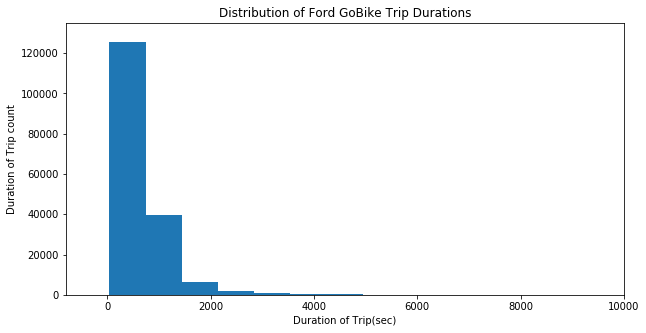

In [16]:
#plotting the distribution of the Trip duration in the dataset
binsize = 700
bin_edges = np.arange(40, ford_Gobike_df['duration_sec'].max() + binsize, binsize)
plt.figure(figsize=[10, 5])
plt.hist(data = ford_Gobike_df, x = 'duration_sec', bins = bin_edges)
#setting minimum and maximun point for x and y axis
plt.axis([ -800,10000, 0, 135000])
plt.xlabel('Duration of Trip(sec)')
plt.ylabel('Duration of Trip count')
plt.title('Distribution of Ford GoBike Trip Durations')
plt.show()

Considering the type of plot obtained in the diagram above(long tail distribution) we will therefore obtain a workable distribution using pandas xscale function. hence, we'll make use of a logarithimic scale.

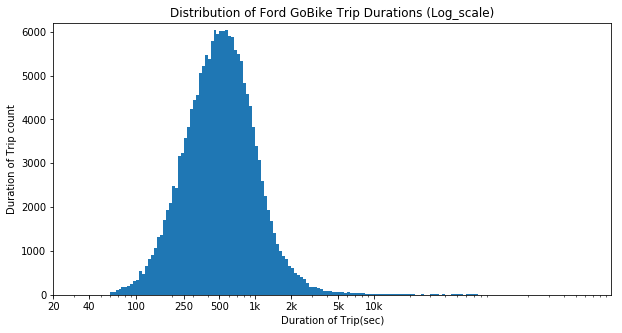

In [17]:
#plotting the Distribution of Ford GoBike Trip Durations using a logarithimic scale
binsize = 0.025
bin_edges = 10 ** np.arange(0.4, np.log10(ford_Gobike_df['duration_sec'].max()) + binsize, binsize)
plt.figure(figsize=[10, 5])
plt.hist(data = ford_Gobike_df, x = 'duration_sec', bins = bin_edges)

#setting up the correspond labels on the plot axis
plt.xlabel('Duration of Trip(sec)')
plt.ylabel('Duration of Trip count')
plt.title('Distribution of Ford GoBike Trip Durations (Log_scale)')

#setting up a logarithm scale
plt.xscale('log')
plt.xticks([ 20, 40, 100, 250, 500, 1e3, 2e3, 5e3, 1e4], [ 20, 40, 100, 250, 500, '1k', '2k', '5k', '10k'])
plt.axis([ 20,1000000, 0, 6200])
plt.show()

As seen in the plot logarithimic scale above, The distribution appears to be fairly symmetric(at least as symmetric as a real data set). The distribution is close enough to be assumed normal however, we can see some outliers as some bikers journeyed for more than 20000 seconds (i.e 1 hour). 
it is however important to note that  majority bikers in San Francisco Bay Area, CA have a tendency towards using the bikes for a more than 600 seconds(i.e 10 mins)

Now that we have seen the distribution of the timeframe utilized by the bikers, lets dive deep into the dataset so that we can understand the factors affecting this duration. 
In respect of this case, we will consider the distribution of the start stations and end station in the dataset. this will shed more light on the distribution of the bikers hence,

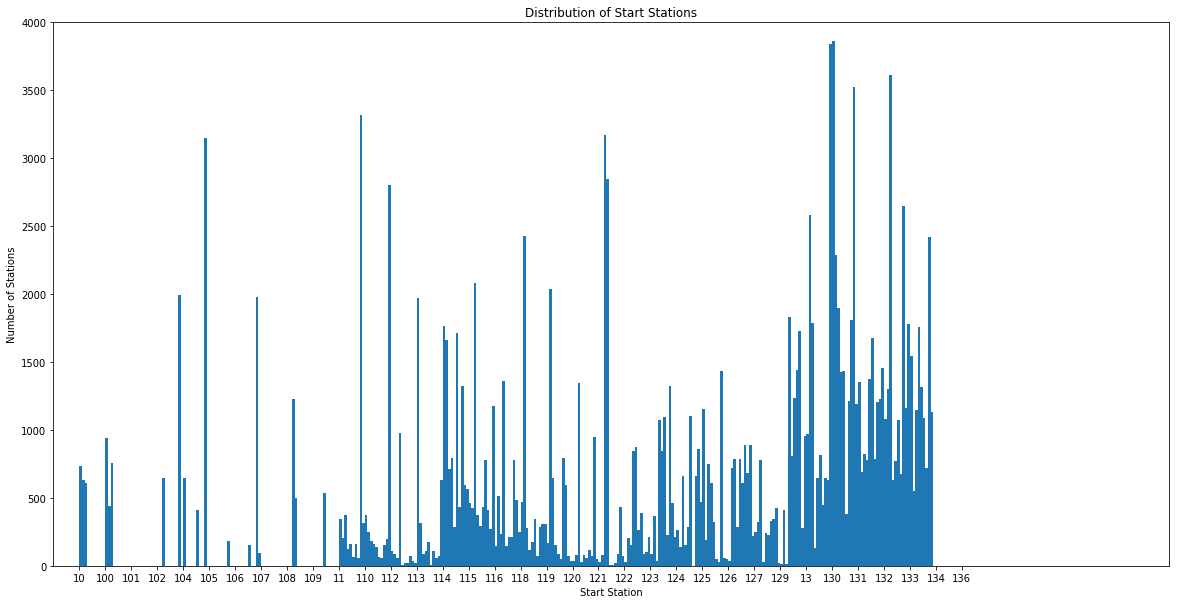

In [18]:
# Plotting the start station id distribution for the dataset.
binsize = 1
bins = np.arange(0, ford_Gobike_df['start_station_id'].astype(int).max()+binsize, binsize)
plt.figure(figsize=[20, 10])
plt.xticks(range(0, 350, 10))
plt.hist(data = ford_Gobike_df, x = 'start_station_id', bins = bins)
plt.axis([ -10, 420, 0, 4000])
plt.title('Distribution of Start Stations')
plt.xlabel('Start Station')
plt.ylabel('Number of Stations')
plt.show()

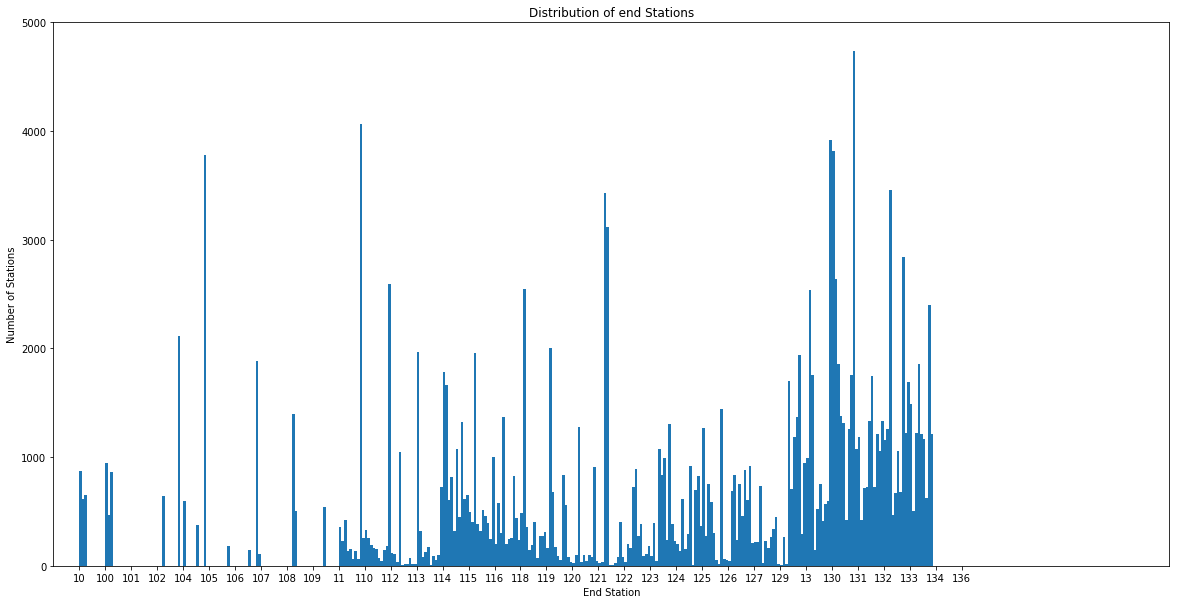

In [19]:
# Plotting the end station id distribution for the dataset.
binsize = 1
bins = np.arange(0, ford_Gobike_df['end_station_id'].astype(int).max()+binsize, binsize)
plt.figure(figsize=[20, 10])
plt.xticks(range(0, 350, 10))
plt.hist(data = ford_Gobike_df, x = 'end_station_id', bins = bins)
plt.axis([ -10, 420, 0, 5000])
plt.title('Distribution of end Stations')
plt.xlabel('End Station')
plt.ylabel('Number of Stations')
plt.show()

As seen from the distribution above, the start and end stations are strongly correlates. this however show that the most bikers used the same start and end stations in  San Francisco Bay Area, CA.

lets see the distribution of the member_age that utilized this start and end stations

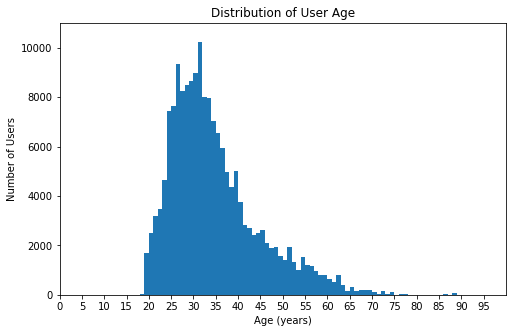

In [52]:
#plotting the distribution of member_age
bin_edges = 1
bins = np.arange(0, ford_Gobike_df['member_age'].astype(int).max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = ford_Gobike_df, x = 'member_age', bins = bins)
plt.axis([0, 100, 0, 11000])
plt.xticks(range(0, 100, 5))
plt.title('Distribution of User Age')
plt.xlabel('Age (years)')
plt.ylabel('Number of Users')
plt.show()

As seen from the chart above, it is very obvious that members that utilized ForGobike system data are between the age of 19 and 45 years old accounting for more than 70% of the total members. we however need to dive deeper in order to know if this users account for the high trip duration. 

##### Inorder to gain more insight on the dataset, the members user type will be considered.

In [21]:
#creating a function for plotting basic bar chart in the dataset
def bar_plot_data(x_value,title,x_label,y_label):
    base_color = sb.color_palette()[0]
    plt.figure(figsize=[8,5])
    sb.countplot(data = ford_Gobike_df, x = x_value, color = base_color)
    plt.yticks(range(0, 165000, 10000))
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    

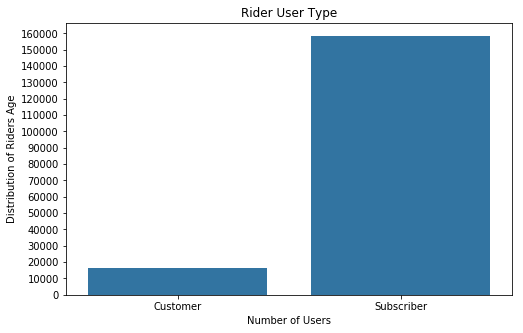

In [22]:
    # plotting types of users on bar
bar_plot_data('user_type','Rider User Type','Number of Users', 'Distribution of Riders Age')

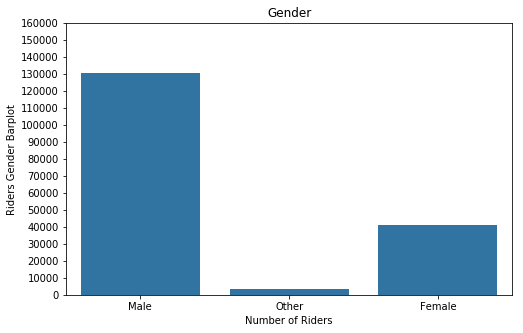

In [23]:
# plotting genders on bar.
bar_plot_data('member_gender','Gender','Number of Riders', 'Riders Gender Barplot')


It is however interesting to note that over 190,000 members in San Francisco Bay Area, CA are subscribers that have passion for biking while over 130,000 members are male with females lagging with a value below 5000 

In [24]:
# creating a categorical variable
#'end_month': ['January','Feburary','March','April','May','June','July','August','September','October','November','December'],
                    
ordinal_var_dict = { 'start_month': ['January','February','March','April','May','June','July','August','September','October','November','December'],
                    'start_period': ['morning', 'afternoon', 'night'],
                    'start_day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                    'end_month': ['January','February','March','April','May','June','July','August','September','October','November','December'],
                    'end_period': ['morning', 'afternoon', 'night'],
                    'end_day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']}

for var in ordinal_var_dict:
        ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
        ford_Gobike_df[var] = ford_Gobike_df[var].astype(ordered_var)

Plotting 

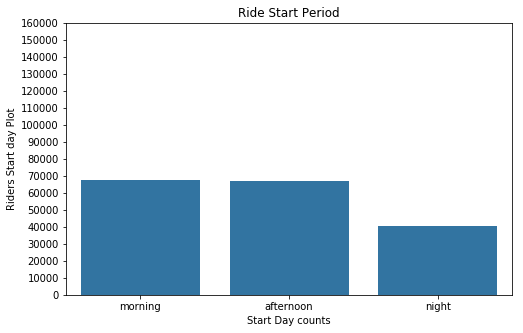

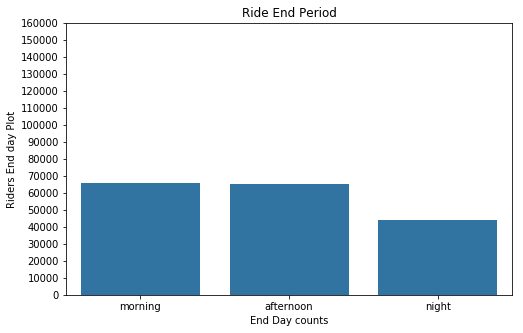

In [25]:
# plotting Ride frequency by Start and End period

bar_plot_data('start_period','Ride Start Period','Start Day counts', 'Riders Start day Plot')
bar_plot_data('end_period','Ride End Period','End Day counts', 'Riders End day Plot')

In [26]:
ford_Gobike_df.start_day.value_counts()

Thursday     33712
Tuesday      30584
Wednesday    28426
Friday       27663
Monday       25641
Sunday       14512
Saturday     14414
Name: start_day, dtype: int64

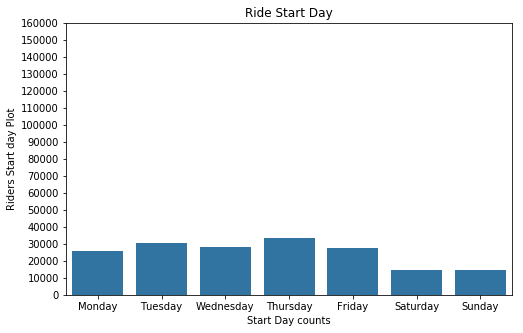

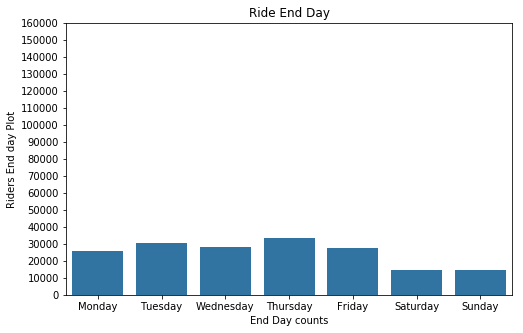

In [27]:
# plotting Ride frequency by Start and end day
bar_plot_data('start_day','Ride Start Day','Start Day counts', 'Riders Start day Plot')
bar_plot_data('end_day','Ride End Day','End Day counts', 'Riders End day Plot')

As seen in the riders start and end stations, we can also see that the riders start and end day strongly correlates. most rides were started and ended on thursday followed by tuesday and friday. Hence members ride activities are high during the week and low during weekends

## Bivariate Exploration

In the course of the Univariate Exploration it was evident that the average duration of members ride was more than 10 mins. we have more subscribers and over 150,000 male members. I also postulated that age  is a major factor that strongly determines the duration of ride in San Francisco Bay Area, CA. In this section the plot of duration will be plotted against relevant variables such as age, genders, ride start and end time.

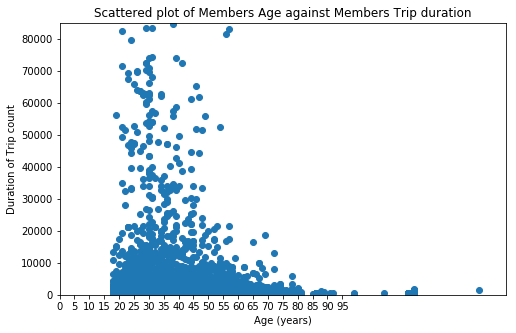

In [28]:
#plotting members ride duration against age

# Scatter plot
plt.figure(figsize=[8,5])
plt.scatter(data = ford_Gobike_df, x = 'member_age', y = 'duration_sec',)
plt.axis([10, 150, 60, 85000])
plt.xticks(range(0, 100, 5))
plt.title('Scattered plot of Members Age against Members Trip duration')
plt.xlabel('Age (years)')
plt.ylabel('Duration of Trip count')
plt.show()

Due to over pllotting, few adjustments will be made to the plot

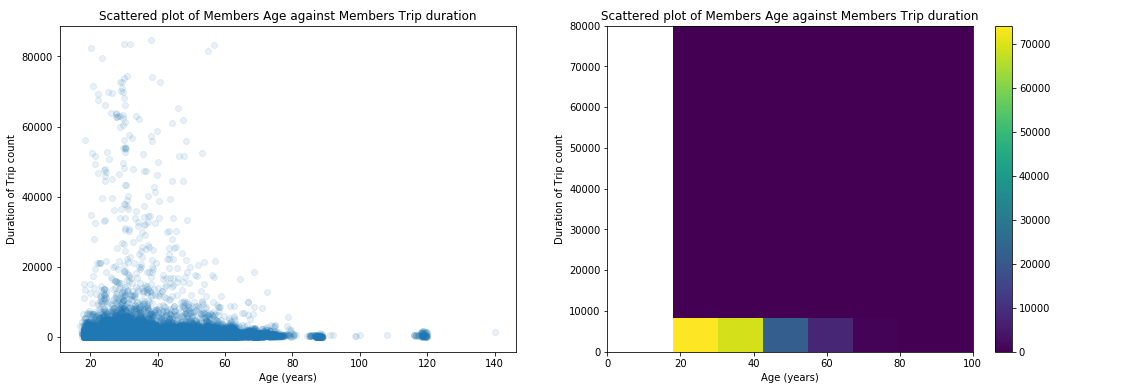

In [29]:

plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
sb.regplot(data = ford_Gobike_df, x = 'member_age', y = 'duration_sec', x_jitter= 1, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('Age (years)')
plt.ylabel('Duration of Trip count (secs)')
plt.title('Scattered plot of Members Age against Members Trip duration')

# PLOT ON Right
plt.subplot(1, 2, 2)
plt.hist2d(data = ford_Gobike_df, x = 'member_age', y = 'duration_sec')
plt.colorbar(ticks=range(0, 10**6, 10**4))
plt.axis([0,100,0,80000])
plt.xlabel('Age (years)')
plt.ylabel('Duration of Trip count(secs)')
plt.title('Scattered plot of Members Age against Members Trip duration')
plt.show()

As seen in the chart above, we can hereby conclude that higher trip duration are clocked by the younger members i.e members between the age of 20 and 40 years. it can be seen that users in this categories amount to a value greater than 60,000.
lets validate other claims by comparing the duration with user genders, start stations and user types

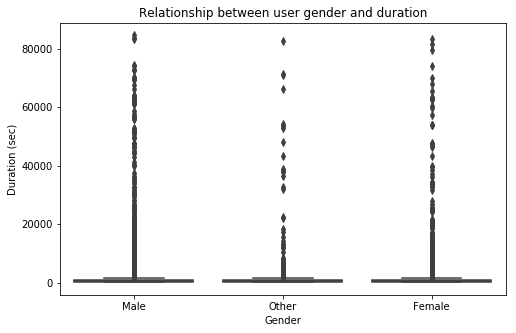

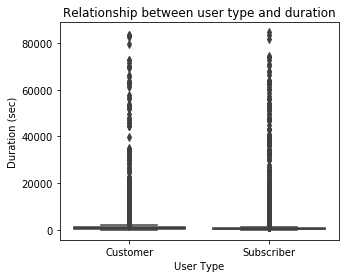

In [30]:
#Plotting the members duration against members genders


base_color = sb.color_palette()[0]
plt.figure(figsize = [8, 5])
sb.boxplot(data = ford_Gobike_df, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.xlabel('Gender')
plt.ylabel('Duration (sec)')
plt.title('Relationship between user gender and duration')


#Plotting the members duration against user types

plt.figure(figsize = [5, 4])
sb.boxplot(data = ford_Gobike_df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.xlabel('User Type')
plt.ylabel('Duration (sec)')
plt.title('Relationship between user type and duration');

Theres a widespread of data between the dataset. inorder to have a better visual of the data, the duration axis limit will be adjusted to the best level.

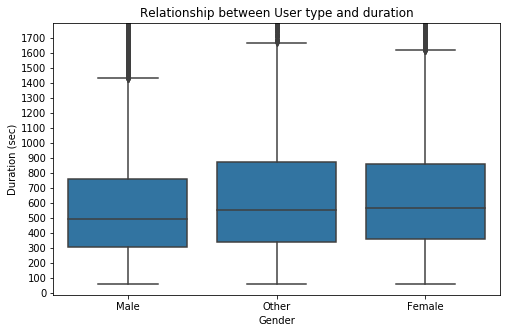

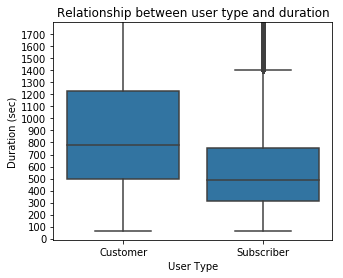

In [31]:
#Plotting the members duration against members genders using appropriate limits

base_color = sb.color_palette()[0]
plt.figure(figsize = [8, 5])
sb.boxplot(data = ford_Gobike_df, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.ylim(-10,1800)
plt.yticks(range(0,1800,100))
plt.xlabel('Gender')
plt.ylabel('Duration (sec)')
plt.title('Relationship between User type and duration')
plt.show()

#Plotting the members duration against user types using appropriate limits

plt.figure(figsize = [5, 4])
sb.boxplot(data = ford_Gobike_df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.ylim(-10,1800)
plt.yticks(range(0,1800,100))
plt.xlabel('User Type')
plt.ylabel('Duration (sec)')
plt.title('Relationship between user type and duration');

As opposed to my prediction, the plot above shows that an average Female and other gender types embark on long trip duration(i.e over 9 mins) while members in male category tend to be lesser. it can also be seen that an average customer tends to embark on long trip duration(i.e over 12 minute) as opposed to subscribers that journeyed below 9 mins. This is very interesting. lets see the days that we have the highest duration count for members.


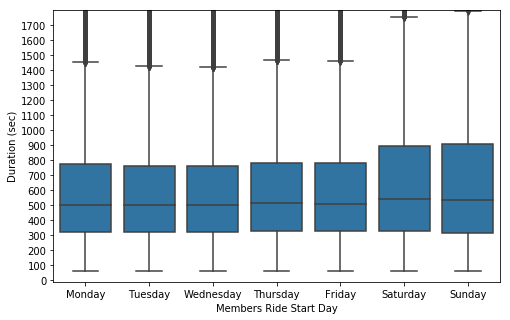

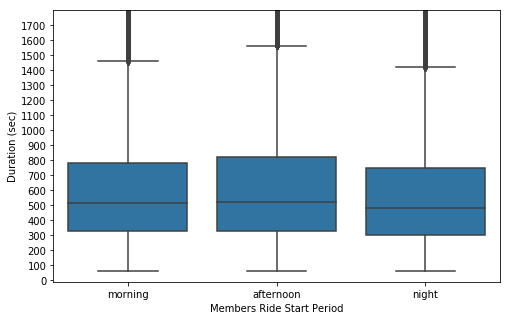

In [32]:
#Plotting the members duration against user types using appropriate limits
plt.figure(figsize = [8, 5])
sb.boxplot(data = ford_Gobike_df, x = 'start_day', y = 'duration_sec', color = base_color)
plt.ylim(-10,1800)
plt.yticks(range(0,1800,100))
plt.xlabel('Members Ride Start Day')
plt.ylabel('Duration (sec)')

#Plotting the members duration against user types using appropriate limits
plt.figure(figsize = [8, 5])
sb.boxplot(data = ford_Gobike_df, x = 'start_period', y = 'duration_sec', color = base_color)
plt.ylim(-10,1800)
plt.yticks(range(0,1800,100))
plt.xlabel('Members Ride Start Period')
plt.ylabel('Duration (sec)');

As seen from the plot above, higher trip duration occurs in the morning and afternoon. In the same light, we also experience higher trip durations during the weekend.

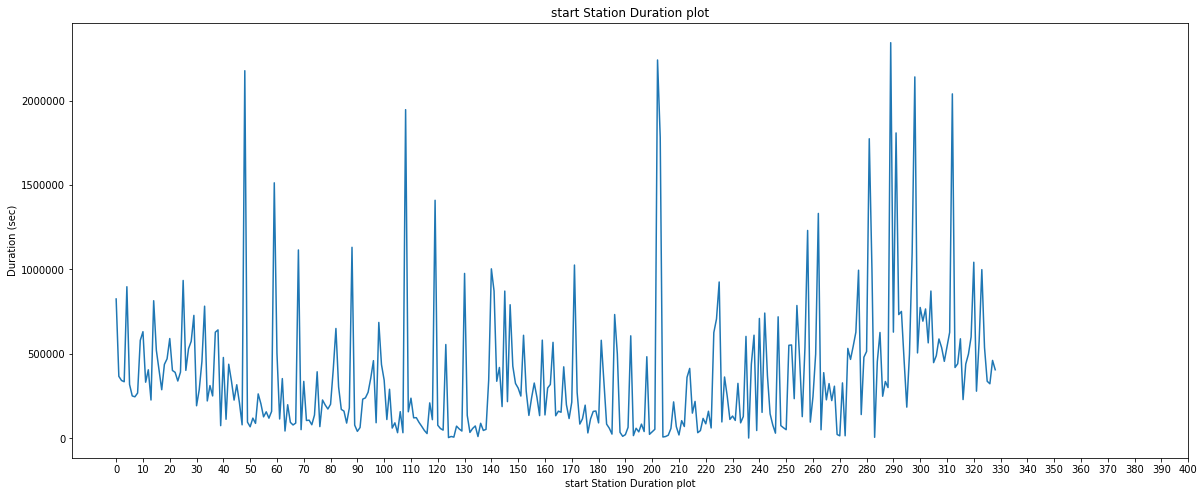

In [33]:
#Plotting the members duration against user types using appropriate limits

start_station_ids = sorted(ford_Gobike_df.start_station_id.unique())
duration_series = []
for x in start_station_ids :
    duration_series.append(ford_Gobike_df[ford_Gobike_df.start_station_id == x].duration_sec.sum()) 
total_duration = pd.Series(duration_series)
plt.figure(figsize = [20, 8])
total_duration.plot(kind= 'line')
plt.xticks(range(0, 401, 10))
plt.xlabel('start Station Duration plot')
plt.ylabel('Duration (sec)')
plt.title('start Station Duration plot');

>As seen from the plot above, we can see that some the start stations trip duration varies un-uniformly with some stations having high and some stations having low trip duration counts. This feature can and should be explored systematically. seeing that the dataset doesn't cover a large period of time, i'll drop this feature and continue with my exploration

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> As expected and seen in the exploration so far, San Francisco Bay Area has over 150,000 members of which over 130,000 are male while we have over 40,000 females. it is obvious that over 70% of forgobike system users are between the age of 19 - 45 years. This same users tends to have Higher trip duration. i couldn't agree less after considering the their population in the dataset. The number of subscriber tends to be higher than the customers but custormers have higher trip duration. most of the ride starts on thursday and ends the same thursday while we have higher trip duration during the weekend.
    The effect of start and end stations the dataset for Feburary 2019 Trip durations in San Francisco Bay Area is not too significant seeing that both stations trip duration correlatesand in order to understand this better, we need access to users address, users bike preference etc.
And as expected some start_stations and end stations will have high trip durations. it can be seen that the stations with high usage recorded high trip duration. which is could be factor of also affect trip duration shows th, CA At a significant value the number of male riders in sanfrancisco bay area surpases the females and other genders.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> it is very interesting to note despite the significant value of male riders in San Francisco Bay Area, females and other genders trip duration  surpases that of the male. so also, despite high numbers of subscribers, the customers trip duration surpassed them. this is very unusual as one would expect that the reverse should be the case.
The corelation between the start and end station in terms of frequency, start period, end period, trip duration is so strong. in order to create a pattern from this, we need to explore a largeset of dataframe covering a large period of time.

## Multivariate Exploration

> In this part, we would explore the impact that the user type and start period has on the trip duration. hence, we will also  investigate the impact that gender and user type has on the trip duration.

##### * The general effect of members gender and their respective age  against their trip duration

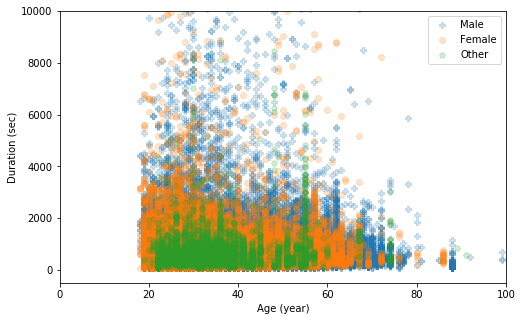

In [34]:

#Plotting the members duration against each users gender and their respective age

gender_markers = [['Male', 'P'],['Female', 'o'],['Other', 'H']]
plt.figure(figsize = [8, 5])
for gender, marker in gender_markers:
    gender_plot_df = ford_Gobike_df[ford_Gobike_df['member_gender'] == gender]
    plt.scatter(gender_plot_df['member_age'], gender_plot_df['duration_sec'], marker = marker, alpha=0.20)
plt.legend(['Male','Female','Other'])
plt.axis([0, 100, -500, 10000 ])
plt.xlabel('Age (year)')
plt.ylabel('Duration (sec)')
plt.show()

>As seen in the plot, the datavalues overlaped. The male gender is dominating followed by the female and other category. our inference is not too visible hence we shall seperate this values so as to compare them accurately.

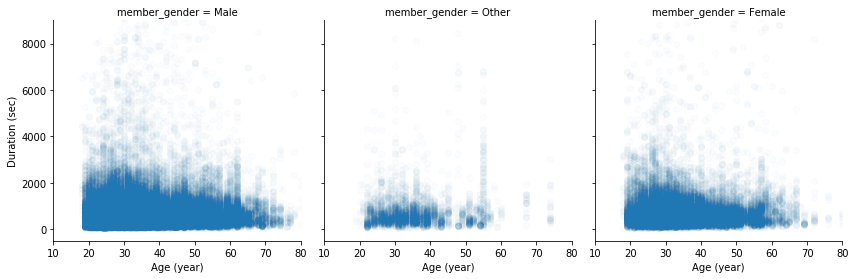

In [35]:
#Plotting the members duration against each users gender and their respective age using appropriate limits

genders_df = sb.FacetGrid(data = ford_Gobike_df, col = 'member_gender', col_wrap = 3, size = 4,
                 xlim = [10, 80], ylim = [-500, 9000])
genders_df.map(plt.scatter, 'member_age', 'duration_sec', alpha=0.02)
genders_df.set_xlabels('Age (year)')
genders_df.set_ylabels('Duration (sec)')
plt.show()

>Generally As seen in the plot, male has higher trip duration between the age of 20 and 45. There is no much difference between the distribution of male and female duration in the dataset but we can see that there the reduction in the duration of users according to age. we can therefore conclude that as the female age is reducing, their tripduration also reduces. This is differs from the male category whose trip duration id fairly constant between the age of 20 and 60 years of age.

>Now lets take a look at the effect of the users type against other varible of interest

###### * The effect of user type and members gender against their Trip duration

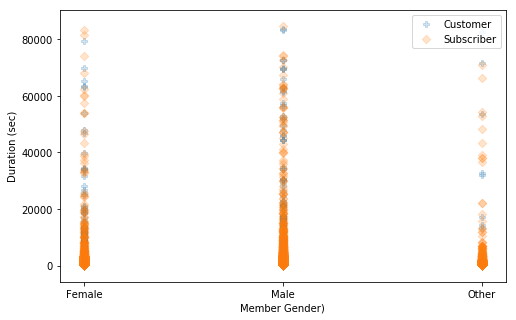

In [36]:
#Plotting the effect of user type and members gender against their Trip duration

user_type_markers = [['Customer', 'P'],['Subscriber', 'D']]
plt.figure(figsize = [8, 5])
for type, marker in user_type_markers:
    usertype_plot_df = ford_Gobike_df[ford_Gobike_df['user_type'] == type]
    plt.scatter((usertype_plot_df['member_gender']), usertype_plot_df['duration_sec'], marker = marker, alpha=0.2)
plt.legend(['Customer','Subscriber'])

plt.xlabel('Member Gender)')
plt.ylabel('Duration (sec)')
plt.show()

>We can see clearly from this plot that male subscribers are dominating with a trip duration over 20,000 seconds. for clarity purposes, lets expand the chart.

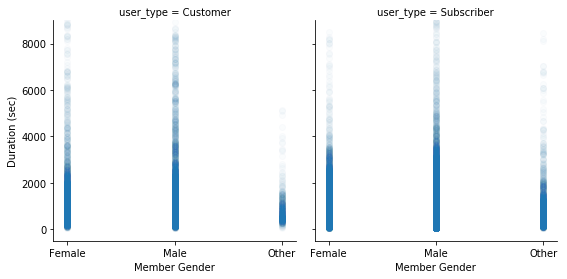

In [37]:
#Plotting the effect of user type and user(members) age against their 
#Trip duration using appropriate limits and faceted scattered plot
usertype_plot_df = sb.FacetGrid(data = ford_Gobike_df, col = 'user_type', col_wrap = 2, size = 4,
                  ylim = [-500, 9000])
usertype_plot_df.map(plt.scatter, 'member_gender', 'duration_sec', alpha=0.02)
usertype_plot_df.set_xlabels('Member Gender')
usertype_plot_df.set_ylabels('Duration (sec)')
plt.show()

>Both male customers and subscribers have higher trip duration but in all cases, subscribers have higher trip duration. it is however interesting to note that the subscribers are in all cases having higher trip duration. lets investigate further by considering other factors.

###### *  The effect of user type and members age against their Trip duration

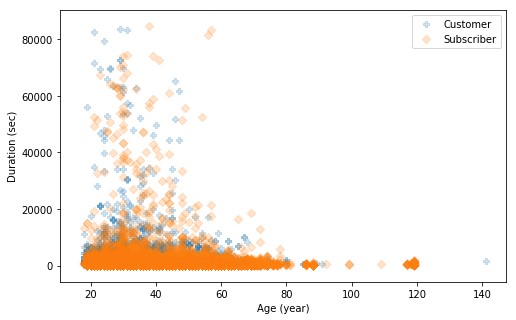

In [38]:
#Plotting the effect of user type and members age against their Trip duration

user_type_markers = [['Customer', 'P'],['Subscriber', 'D']]
plt.figure(figsize = [8, 5])
for type, marker in user_type_markers:
    usertype_plot_df = ford_Gobike_df[ford_Gobike_df['user_type'] == type]
    plt.scatter((usertype_plot_df['member_age']), usertype_plot_df['duration_sec'], marker = marker, alpha=0.2)
plt.legend(['Customer','Subscriber'])

plt.xlabel('Age (year)')
plt.ylabel('Duration (sec)')
plt.show()

>The number of subscribers slowly declines with age. lets obtain a clearer picture of the inference. 

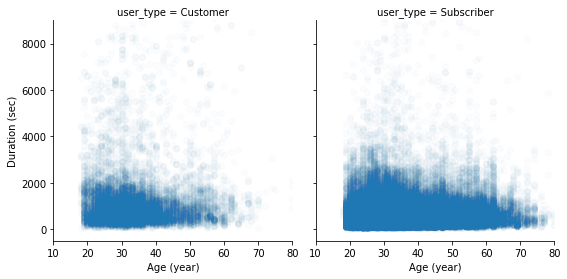

In [39]:
#Plotting the effect of user type and user(members) age against their 
#Trip duration using appropriate limits and faceted scattered plot
usertype_plot_df = sb.FacetGrid(data = ford_Gobike_df, col = 'user_type', col_wrap = 2, size = 4,
                 xlim = [10, 80], ylim = [-500, 9000])
usertype_plot_df.map(plt.scatter, 'member_age', 'duration_sec', alpha=0.02)
usertype_plot_df.set_xlabels('Age (year)')
usertype_plot_df.set_ylabels('Duration (sec)')
plt.show()

> Generally we have more subscribers than customers and aside from the fact that we have more subscribers, we also have more subscribers between the age of 60 and 80 years. this set of subscribers also has high trip duration.
let us also consider the effect of start period

##### * The effect of user type, start_period against their Trip duration

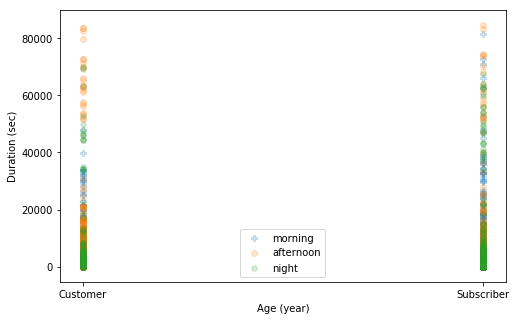

In [40]:
#Plotting the effect of user type, start_period against their Trip duration

period_markers = [['morning', 'P'],['afternoon', 'o'],['night', 'H']]
plt.figure(figsize = [8, 5])
for period, marker in period_markers:
    start_period_plot_df = ford_Gobike_df[ford_Gobike_df['start_period'] == period]
    plt.scatter(start_period_plot_df['user_type'], start_period_plot_df['duration_sec'], marker = marker, alpha=0.20) 
plt.legend(['morning','afternoon', 'night'])
plt.xlabel('Age (year)')
plt.ylabel('Duration (sec)')
plt.show()

>Considering the effect of start period, lets use a faceted scattered plot for clarity

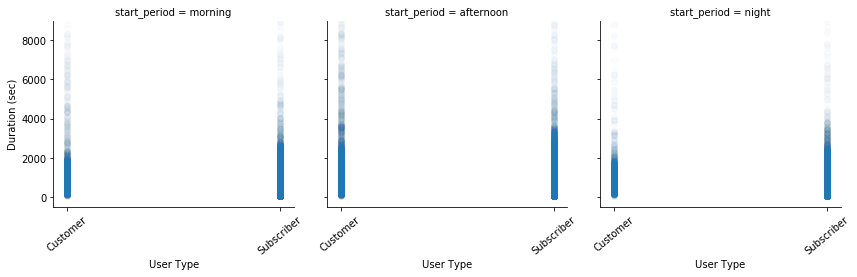

In [41]:

#Plotting the effect of start_period and user type  against their Trip duration using appropriate limits and faceted scattered plot
plt.figure(figsize = [10, 5])
# create faceted scattered plot
start_period_plot_df = sb.FacetGrid(data = ford_Gobike_df, col = 'start_period', 
                                    col_wrap = 3, size = 4, ylim = [-500, 9000])
plt.xticks(rotation=45)
start_period_plot_df.map(plt.scatter, 'user_type', 'duration_sec', alpha=0.01)
start_period_plot_df.set_xlabels('User Type')
start_period_plot_df.set_xticklabels(rotation = 40)
start_period_plot_df.set_ylabels('Duration (sec)')
plt.show()

> From the plot above, it can be seen that through out the day(morning afternoon and night), subscribers tends to have high trip duration. however we can also state explictly that both subscribers and customers have higher trip duration in the afternoon. this is a similarity that exist between customers and subscribers. now lets consider the effect that the start day presents.

##### * The effect of start_day and user type  against their Trip duration

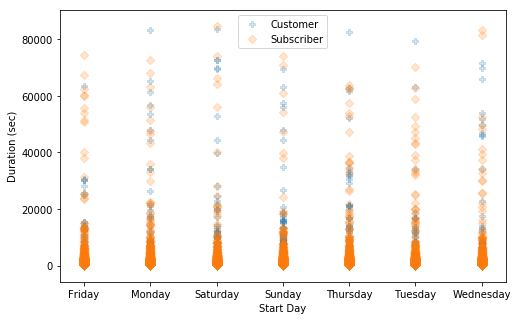

In [42]:

#Plotting the effect of start_day and user type  against their Trip duration
user_type_markers = [['Customer', 'P'],['Subscriber', 'D']]
plt.figure(figsize = [8, 5])
for type, marker in user_type_markers:
    usertype_plot_df = ford_Gobike_df[ford_Gobike_df['user_type'] == type]
    plt.scatter((usertype_plot_df['start_day']), usertype_plot_df['duration_sec'], marker = marker, alpha=0.2) 
plt.legend(['Customer','Subscriber'])
plt.xlabel('Start Day')
plt.ylabel('Duration (sec)')
plt.show()

>the data values for both subscribers and customers overlapped, lets split them for clarity purposes.

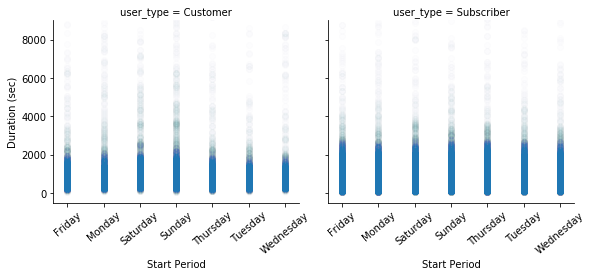

In [43]:
#Plotting the effect of start_day and user type against their Trip duration using faceted scattered plot
plt.figure(figsize = [10, 5])
start_period_plot_df = sb.FacetGrid(data = ford_Gobike_df, col = 'user_type', 
                                    col_wrap = 3, size = 4, ylim = [-500, 9000])
plt.xticks(rotation=45)
start_period_plot_df.map(plt.scatter, 'start_day', 'duration_sec', alpha=0.009)
start_period_plot_df.set_xlabels('Start Period')
start_period_plot_df.set_xticklabels(rotation = 40)
start_period_plot_df.set_ylabels('Duration (sec)')
plt.show()

>As seen in the plot, throughout the week(sunday-monday) subscribers has more trip duration than customers however for both customers and subscribers, the trip duration throughout the week is fairly constant

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> As seen in this part of the investigation, The subscribers in San Francisco Bay Area has a very strong effect on trip duration. we could see throughout the whole week and days that the trip duration recorded for subscribers are higher than that of the customers. when age is considered, The male tend to have higher trip duration. however, this does not exclude the fact that an average female has higher trip duration when compareed

### Were there any interesting or surprising interactions between features?

> The start period and day strengthened the fact that more subscribers have higher trip duration. when considered closely we will note that the number of male that had higher trip duration are still subscribers. This can be clearly revealed by carrying out some data wrangling.
>we can also note that there is a slight increase in trip duration for male and female customers and subscribers between the age of 60 and 70 years. This effect need to be investigated further.

## Conclusions
> In conclusion, San Francisco Bay Forgo Bike Trip duration is at first dependent on the age(between 20 and 40 years of age), the members gender(Female embarking on trip duration over 9 mins) and user types(customers embarking more on longer trip duration).
when the user type start period and user age is taken as a case study, young male subscribers can be seen embarking on a long trip duration in the afternoon.
